###################################################<br>
title: NFL QB Predictor<br>
author: Kevin Huang<br>
date: 20170519(original date), Edits made 20180720<br>
output: Datasets used for Analysis - 6 Total Datasets<br>
Notes: Preprocessing: Exploratory Data Analysis<br>
python version: 3.6.5: Anaconda 4.3.1<br>
###################################################<br>


#### Import libraries & load dataset

In [2]:
import pandas as pd
import numpy as np
import os, sys

In [11]:
# Creating variables for the path of file
file_path = '/Users/kevin8523/Desktop/Github/nfldraft_qb_study/data_created'

# Set working directory 
os.chdir(file_path)
os.getcwd()

# Read in Data
df = pd.read_csv('Dataset_All.csv', header=0)

#### Quick sanity check of the data

In [12]:
# Shape of the data
print('\033[1m'+'DATASET','(ROWS, COLUMNS)'+'\033[0m')
print('df',df.shape)

DATASET (ROWS, COLUMNS)
df (2218, 36)


In [13]:
# df.head(), df.tail(),df.info(),df.describe()
df.head(2)

,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,Vertical,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio
0,1,1,Danny Wuerffel,Florida,SEC,11,210,325,64.6,3266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777778
1,2,2,Bobby Hoying,Ohio State,Big Ten,13,211,341,61.9,3269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.707317


#### Scrub data for exploratory data analysis


In [14]:
# Take the latest year for multiple years playing
df['dupe'] = df.Player+df['School.x'] # Create duplicate column
df = df.drop_duplicates('dupe', keep='last')
# Check to ensure no duplication
df[df.Player == 'Peyton Manning'].head(5)


,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio,dupe
205,206,22,Peyton Manning,Tennessee,SEC,12,287,477,60.2,3819,...,NaN,NaN,NaN,NaN,NaN,19.0,QB,Yes,0.765957,Peyton ManningTennessee


In [15]:
# Add No to NA in ProBowl Variable
df['Pro_bowl'] = df.Pro_bowl.fillna('No')

#### Exploratory Data Analysis

In [16]:
# Visualize data for exploration 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visualize Data 
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [58]:
# Select a list of columns to visualize
# Reorder columns
list(df.columns.values)
df_viz = df[['Player',
 'School.x',
 'Conf',
 'G',
 'Cmp',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'AY.A',
 'TD',
 'Int',
 'Rate',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Year.x',
 'Year.y',
 'Height',
 'Wt',
 'Pro_bowl',
 'TD_INT_Ratio']]

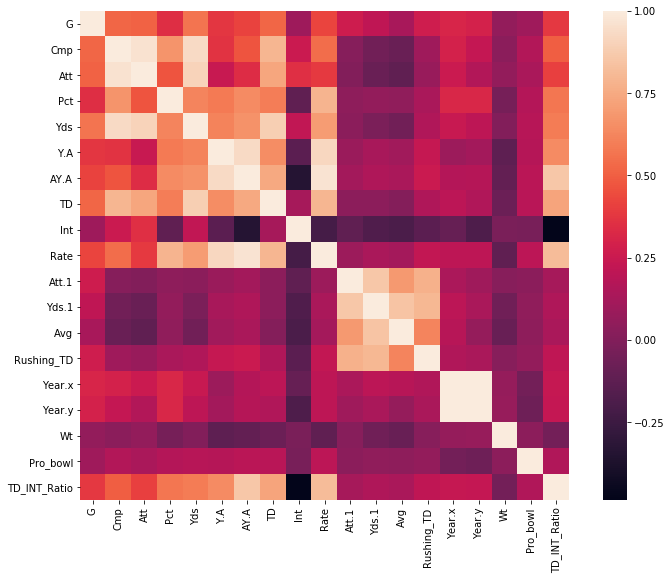

In [57]:
# Correlation matrix 
# seaborn
corrmat = df_viz.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

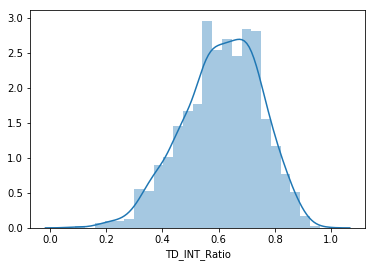

In [19]:
# Distrbution of Qb TDs
# seaborn
sns.distplot(df_viz.TD_INT_Ratio)

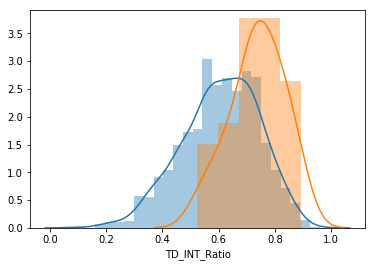

In [20]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.TD_INT_Ratio)
sns.distplot(df_pb.TD_INT_Ratio)

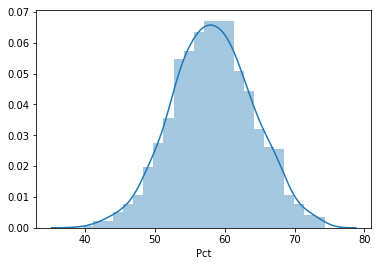

In [21]:
# Distrbution of Qb Accuracy
# seaborn
sns.distplot(df_viz.Pct)

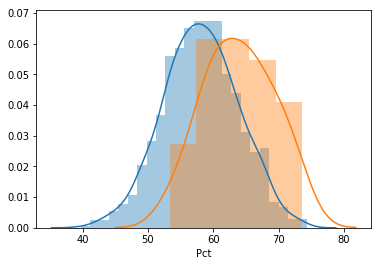

In [22]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Pct)
sns.distplot(df_pb.Pct)

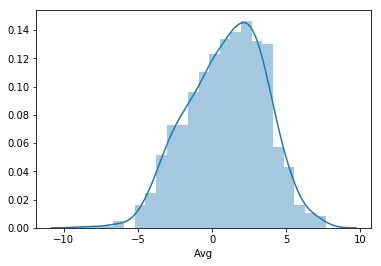

In [23]:
# Distrbution of sacked YPC Running
# seaborn
sns.distplot(df_viz.Avg)

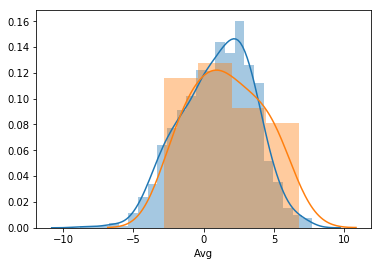

In [24]:
# Distrbution of Probowl and Non Probowl YPC Running 
# Tells you if they get sacked alot. In college for some reason sacks counts for ypc
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Avg)
sns.distplot(df_pb.Avg)

In [25]:
# Scatter plot of Accuracy & TD for QBs
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']

# creating trace1
trace1 = go.Scatter(
                    x = df_pb.Pct,
                    y = df_pb.TD,
                    mode = "markers",
                    name = "Probowl QB",
                    marker = dict(color = 'Green'),
                    text= df_pb.Player)
# creating trace2
trace2 = go.Scatter(
                    x = df_nopb.Pct,
                    y = df_nopb.TD,
                    mode = "markers",
                    name = "Non Probowl QB",
                    marker = dict(color = 'Yellow'),
                    text= df_nopb.Player)
# Layers of visual
data = [trace2, trace1]
# Layout
layout = dict(title = 'Accuracy & TD of Probowl vs Non Probowl QBs',
              xaxis= dict(title= 'Accuracy %',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TD',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig) #iplot for inline / plot for new html

In [26]:
# Number of Probowl QB by Conference
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']
df_nopb = df_nopb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

# Creating trace1
trace1 = go.Bar(
                x = df_pb.Conf,
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Create trace2
trace2 = go.Bar(
                x = df_nopb.Conf,
                y = df_nopb.counts,
                name = "Count of Non-Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Layers of visual
data = [trace1,trace2]

# Layout
layout = go.Layout(
                   title = 'Probowlers By Conf',
                   barmode = 'stack',
                   yaxis = dict(title = 'Count by Conference')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [27]:
# Number of Probowl QB by Year
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Year.x']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_pb['Year.x'],
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Year',
                   xaxis = dict(tickmode = 'linear',tickangle=90),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [28]:
# Number of Probowl QB by Height
# Plotly

df_phys = df_viz[['Player',
 'School.x',
 'Height',
 'Wt',
 'Pro_bowl',]]

df_phys = df_viz[df_viz.Pro_bowl == 'Yes']
df_phys = df_phys.groupby(['Height']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_phys['Height'],
                y = df_phys.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Height',
                   xaxis = dict(tickmode = 'linear'),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

#### Dimensionality reduction: PCA

Principal Component Analysis (PCA) identifies the combination of 
attributes (principal components, or directions in the feature space)
that account for the most variance in the data.

Let's calculate the 2 first principal components of the training data,
and then create a scatter plot visualizing the training data examples
projected on the calculated components.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [30]:
# Data to be used for PCA
df_pca = df[['Player',
 'G',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'TD',
 'Int',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl',
 'TD_INT_Ratio']]

In [31]:
# Change Categorical Variable to integers
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['Yes'], 1)
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['No'], 0)

In [32]:
# Splits the columns of dataset for ML algorithim
# All columns but Target column to X and target column to y
X, y = df_pca.loc[:,df_pca.columns != "Pro_bowl"], df_pca.Pro_bowl

In [33]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.238,shuffle = False, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(905, 13) (905,)
(283, 13) (283,)


In [34]:
# Since this timeseries information, split to 2012 and before and after 2012
X_train.tail(2)

,Player,G,Att,Pct,Yds,Y.A,TD,Int,Att.1,Yds.1,Avg,Rushing_TD,TD_INT_Ratio
1798,Jordan Webb,10,265,54.3,1434,5.4,8,8,64,-135,-2.1,2,0.500
1799,Mike Wegzyn,11,346,52.6,1825,5.3,6,10,93,141,1.5,2,0.375


In [35]:
# For Scikit Learn you have to convert to an array before using library
X_train = X_train.drop(['Player'], axis=1).values
y_train = y_train.values.astype(np.int8)
target_names = np.unique(y) #np.sort(np.unique(y))
labels = ["No Probowl", "ProBowl"]
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 2 unique target values in this dataset: [0 1]


In [36]:
# Normalize each feature to unit norm (vector length)
X_normalized = normalize(X_train, axis=0)

In [37]:
n_comp = 5
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=100)
X_pca = pca.fit_transform(X_normalized)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9663
Individual variance contributions:
0.6722738943784984
0.1361033482993908
0.08414201319398608
0.043788966697799345
0.030020407892961693


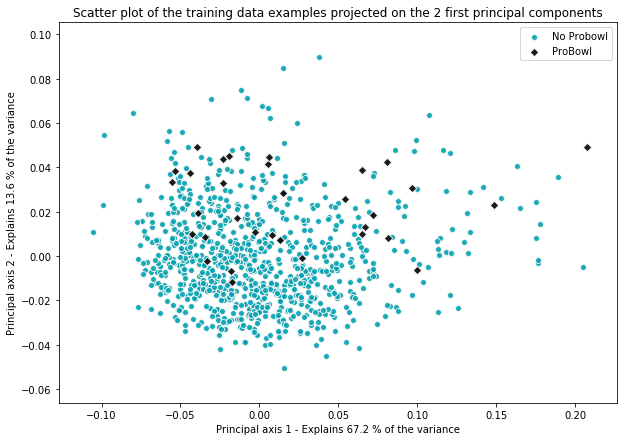

In [38]:
# Visualize PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(
        target_names, markers, colors, labels):
    ax.scatter(X_pca[np.where(y_train == class_ix), 0],
               X_pca[np.where(y_train == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(
    "Scatter plot of the training data examples projected on the "
    "2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[1] * 100.0))
plt.show()

#### SMOTE oversampling because of Class Imbalances

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# Data to be used for PCA
df_pca = df[['Player',
 'G',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'TD',
 'Int',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl',
 'TD_INT_Ratio']]

In [41]:
# Change Categorical Variable to integers
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['Yes'], 1)
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['No'], 0)

In [42]:
# Splits the columns of dataset for ML algorithim
# All columns but Target column to X and target column to y
X, y = df_pca.loc[:,df_pca.columns != "Pro_bowl"], df_pca.Pro_bowl

In [43]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.238,shuffle = False, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(905, 13) (905,)
(283, 13) (283,)


In [44]:
# Drop Players for SMOTE to run
X_train = X_train.drop(['Player'], axis=1)

In [45]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(y_train.value_counts(), np.bincount(y_train_res))

0    873
1     32
Name: Pro_bowl, dtype: int64 [873 873]


In [46]:
target_names = np.unique(y_train) #np.sort(np.unique(y_res))
labels = ["No Probowl", "ProBowl"]
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 2 unique target values in this dataset: [0 1]


In [47]:
# Normalize each feature to unit norm (vector length)
X_normalized = normalize(X_train_res, axis=0)

In [48]:
n_comp = 5
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=100)
X_pca = pca.fit_transform(X_normalized)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9749
Individual variance contributions:
0.72535940829385
0.11733971486617971
0.0700046973435224
0.04154277288285618
0.020683357276582572


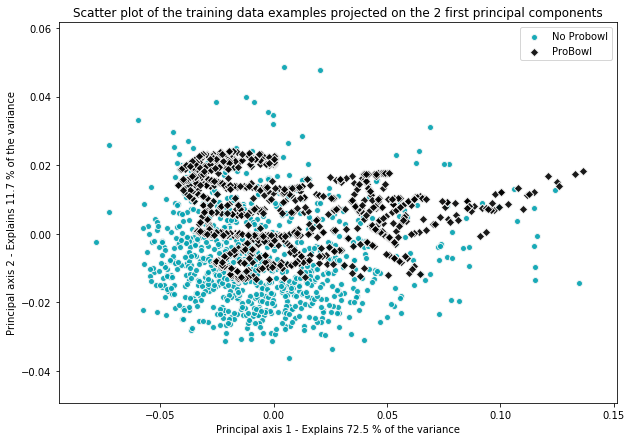

In [49]:
# Visualize PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(
        target_names, markers, colors, labels):
    ax.scatter(X_pca[np.where(y_train_res == class_ix), 0],
               X_pca[np.where(y_train_res == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(
    "Scatter plot of the training data examples projected on the "
    "2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[1] * 100.0))
plt.show()

#### Machine Learning: Making Predictions

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [160]:
# Data to be used for ML
df_ml = df[['Player',
 'G',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'TD',
 'Int',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl',
 'TD_INT_Ratio']]

In [161]:
df_ml.describe()

,G,Att,Pct,Yds,Y.A,TD,Int,Att.1,Yds.1,Avg,Rushing_TD,TD_INT_Ratio
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,11.630471,333.053872,58.284007,2434.014310,7.236279,17.170034,9.876263,78.585017,152.547138,0.976768,3.170034,0.611012
std,1.276044,92.147315,5.816087,833.969584,1.074906,8.756254,3.598278,42.383439,280.886157,2.603186,3.383599,0.138362
min,9.000000,166.000000,39.700000,834.000000,4.500000,1.000000,1.000000,9.000000,-373.000000,-8.800000,0.000000,0.090909
25%,11.000000,261.000000,54.300000,1819.500000,6.500000,11.000000,7.000000,48.000000,-40.000000,-0.900000,1.000000,0.523292
50%,12.000000,326.000000,58.300000,2316.500000,7.200000,16.000000,10.000000,68.000000,79.000000,1.200000,2.000000,0.620690
75%,13.000000,395.250000,62.200000,2958.000000,7.900000,22.000000,12.000000,100.000000,268.250000,2.900000,4.000000,0.714286
max,15.000000,719.000000,74.300000,5833.000000,11.300000,52.000000,23.000000,292.000000,1920.000000,7.700000,23.000000,0.960000


In [182]:
df_ml = df[['Player',
 'Pct',
 'Yds',
 'TD_INT_Ratio',
 'Y.A',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl'
]]

In [183]:
df_ml.tail()

,Player,Pct,Yds,TD_INT_Ratio,Y.A,Yds.1,Avg,Rushing_TD,Pro_bowl
2213,Mason Fine,59.4,1572,0.545455,6.0,118,1.3,2,No
2214,McKenzie Milton,57.7,1983,0.588235,5.9,158,1.6,3,No
2215,John Wolford,55.5,1774,0.473684,5.9,521,4.0,6,No
2216,Tyree Jackson,53.1,1772,0.500000,5.7,399,4.0,5,No
2217,Glen Cuiellette,42.6,1309,0.555556,5.5,216,1.8,1,No


In [184]:
# Change Categorical Variable to integers
df_ml['Pro_bowl'] = df_ml['Pro_bowl'].replace(['Yes'], 1)
df_ml['Pro_bowl'] = df_ml['Pro_bowl'].replace(['No'], 0)

In [185]:
# Splits the columns of dataset for ML algorithim
# All columns but Target column to X and target column to y
X, y = df_ml.loc[:,df_ml.columns != "Pro_bowl"], df_ml.Pro_bowl

In [186]:
# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.238,shuffle = False, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(905, 8) (905,)
(283, 8) (283,)


In [187]:
# Normalize the data (Not needed for RF)
X_train.tail()

,Player,Pct,Yds,TD_INT_Ratio,Y.A,Yds.1,Avg,Rushing_TD
1791,Alex Zordich,51.0,1254,0.562500,6.0,500,5.0,1
1793,Andrew Maxwell,52.5,2606,0.590909,5.8,-106,-2.9,0
1794,James Vandenberg,57.3,2249,0.466667,5.8,16,0.3,4
1798,Jordan Webb,54.3,1434,0.500000,5.4,-135,-2.1,2
1799,Mike Wegzyn,52.6,1825,0.375000,5.3,141,1.5,2


In [188]:
# For Scikit Learn you have to convert to an array before using library
X_train = X_train.drop(['Player'], axis=1).values
y_train = y_train.values.astype(np.int8)
target_names = np.unique(y) #np.sort(np.unique(y))
labels = ["No Probowl", "ProBowl"]
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 2 unique target values in this dataset: [0 1]


In [189]:
classification_rf = RandomForestClassifier(n_estimators=50, max_features = 3, 
                                           min_samples_leaf=50, random_state=4)
classification_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [190]:
# Drop Players for test set data for ML to run
X_test = X_test.drop(['Player'], axis=1)

In [191]:
# View prediction
y_pred = classification_rf.predict(X_test)

In [192]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [193]:
# View predicted probabilties
classification_rf.predict_proba(X_test)[0:7]

array([[0.88777397, 0.11222603],
       [0.84703899, 0.15296101],
       [0.84785364, 0.15214636],
       [0.84102255, 0.15897745],
       [0.84253205, 0.15746795],
       [0.86360086, 0.13639914],
       [0.87232253, 0.12767747]])

In [194]:
# Converts array so you can join back with df
y_pred = list(y_pred)
X_test['y_pred'] = pd.Series(y_pred, index = X_test.index)

In [195]:
# Join datasets back to see results with df 
df_pred = pd.merge(X[['Player']], X_test,
                   left_index = True, right_index=True, how = 'inner')

In [196]:
df_pred[(df_pred['y_pred'] == 1)]

,Player,Pct,Yds,TD_INT_Ratio,Y.A,Yds.1,Avg,Rushing_TD,y_pred


In [198]:
X_test = X_test.drop('y_pred',1)
print('Validation Results')
print(classification_rf.score(X_test, y_test))
print(recall_score(y_test, classification_rf.predict(X_test)))
print('\nTest Results')
print(classification_rf.score(y_train, y_test))
print(recall_score(y_test, classification_rf.predict(y_train)))

Validation Results
0.9858657243816255
0.0

Test Results


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.